In [1]:
import numpy as np
import tensorflow as tf

In [5]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("C:/Users/chen jia ni/Desktop/MNIST_data/MNIST_data/",one_hot = True)#导入tensorflow自带的案例数据集

Extracting C:/Users/chen jia ni/Desktop/MNIST_data/MNIST_data/train-images-idx3-ubyte.gz
Extracting C:/Users/chen jia ni/Desktop/MNIST_data/MNIST_data/train-labels-idx1-ubyte.gz
Extracting C:/Users/chen jia ni/Desktop/MNIST_data/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting C:/Users/chen jia ni/Desktop/MNIST_data/MNIST_data/t10k-labels-idx1-ubyte.gz


原因是网络的原因，无法从tensorflow的py脚本程序中指定的网站下载mnist数据集。
解决方法： https://blog.csdn.net/landcruiser007/article/details/79346982

In [6]:
len(mnist.train.images),len(mnist.train.labels)#55000张训练图像

(55000, 55000)

In [7]:
len(mnist.test.images),len(mnist.test.labels)

(10000, 10000)

In [8]:
mnist.train.images[0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [9]:
len(mnist.train.images[0])

784

In [10]:
import matplotlib.pyplot as plt

In [11]:
%matplotlib inline

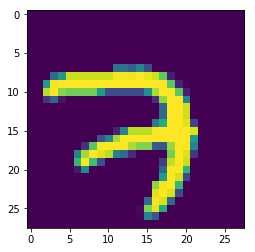

In [12]:
plt.imshow(mnist.train.images[0].reshape(28,28))#28像素乘以28像素

In [13]:
mnist.train.labels[0]#标签与图片对应

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.])

In [14]:
x = tf.placeholder("float",shape=[None,784])#不对照片数量限制
y_ =tf.placeholder("float",shape=[None,10])#标签长度是10

In [17]:
W = tf.Variable(tf.zeros([784,10]))#用zeros初始化变量为0
b = tf.Variable(tf.zeros([10]))

了解以下步骤原理

In [19]:
y = tf.nn.softmax(tf.matmul(x,W)+b)#计算预测值

In [24]:
loss = -tf.reduce_sum(y_*tf.log(y))#？？交叉熵的定义算实际的值y_,算损失函数

In [22]:
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(loss)#训练部分，学习速率，最小化损失

In [23]:
sess =tf.Session()
sess.run(tf.global_variables_initializer())

In [26]:
for i in range(1100):
    batch = mnist.train.next_batch(50)#一批50张
    sess.run(train_step,feed_dict={x:batch[0],y_:batch[1]})#x是训练图像，y_是实际对应label
    if i%50 ==0:
        print(sess.run(loss,feed_dict={x:batch[0],y_:batch[1]}))

73.8567
9.70837
20.1027
22.9447
8.91555
16.2864
8.82876
10.2112
7.25613
10.4934
11.1946
15.3149
21.0932
11.246
16.1286
11.2854
5.56642
9.5298
8.58076
5.82289
12.2482
6.57397


计算准确率

In [27]:
correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(y_,1))#预测最大概率所在索引与实际对比

In [28]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction,"float"))#cast改变数值类型

In [29]:
acc = sess.run(accuracy, feed_dict={x:mnist.test.images, y_:mnist.test.labels})

在test数据集上计算正确率

In [30]:
print(acc)

0.9139
